# Centrality Analysis

**Bridge Analysis**
- Type 1: Bridges that have followers from both communities
  -  Betweeness Centrality :   

- Type 2: Bridges that have followers only from one communities, and follow one or more bridges itself.
  -  Betweeness Centrality : How critical is the node in spreading information into the community where all its followers are from.
  -  Closeness Centrality : How efficient it is for information to spread from this user/node.

**Community Analysis**
- Closeness Centrality : lower the closeness indicates the more important the node is within its echo chamber. 

In [ ]:
%load_ext autoreload
%autoreload 2

import json
import os
import sys
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3
# from netgraph import Graph
sys.path.insert(0, '/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset')
import header as head

centrality_path = "/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/centrality"

## Graph Construction

Edge Represent following relations

In [ ]:
with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/bridges/user_followed_by.json") as file:
    followed_by = json.load(file)

with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/community_detection/with_bridges.json") as file:
    communities = json.load(file)

G = nx.DiGraph()

G.add_nodes_from(communities["rumours"])
rumourEdges = []
rumourNodes = communities["rumours"]

G.add_nodes_from(communities["non_rumours"])
non_rumourEdges = []
non_rumourNodes = communities["non_rumours"]

G.add_nodes_from(communities["bridges"])
bridgeEdges = []
bridgeNodes = communities["bridges"]

for id in followed_by:
    user = followed_by[id]

    # if id in communities["rumours"]: rumourNodes.append(id)
    # elif id in communities["non_rumours"]: non_rumourNodes.append(id)
    # elif id in communities["bridges"]: bridgeNodes.append(id)

    for follower in user["rumours"]: 
        rumourEdges.append((follower,id))
        G.add_edge(follower,id)

    for follower in user["non_rumours"]: 
        non_rumourEdges.append((follower,id))
        G.add_edge(follower,id)
    
    for follower in user["bridges"]: 
        bridgeEdges.append((follower,id))
        G.add_edge(follower,id)

isolates = list(nx.isolates(G))
G.remove_edges_from(isolates)

isolates = set(isolates)
rumourNodes = set(rumourNodes).difference(isolates)
non_rumourNodes = set(non_rumourNodes).difference(isolates)
bridgeNodes = set(bridgeNodes).difference(isolates)

## Degree Centrality 

In degree analysis

In [ ]:
in_degree = nx.in_degree_centrality(G)
rum = {}
non_rum = {}
bridges = {}

for id in list(in_degree):
    if id in communities["rumours"] : rum[id]=in_degree[id]
    elif id in communities["non_rumours"] : non_rum[id]=in_degree[id]
    elif id in communities["bridges"] : bridges[id]=in_degree[id]

# Sort each list 
rum = dict(sorted(rum.items(), key=lambda item: item[1],reverse=True))
non_rum = dict(sorted(non_rum.items(), key=lambda item: item[1],reverse=True))
bridges = dict(sorted(bridges.items(), key=lambda item: item[1],reverse=True))

in_degree = {
    "rumours": rum,
    "non_rum": non_rum,
    "bridges": bridges
}

head.writeToJSON(head.makePath([centrality_path,"degree"]),"in_degree",in_degree)

Out degree analysis

In [ ]:
out_degree = nx.out_degree_centrality(G)
rum = {}
non_rum = {}
bridges = {}

for id in list(in_degree):
    if id in communities["rumours"] : rum[id]=out_degree[id]
    elif id in communities["non_rumours"] : non_rum[id]=out_degree[id]
    elif id in communities["bridges"] : bridges[id]=out_degree[id]

# Sort each list 
rum = dict(sorted(rum.items(), key=lambda item: item[1],reverse=True))
non_rum = dict(sorted(non_rum.items(), key=lambda item: item[1],reverse=True))
bridges = dict(sorted(bridges.items(), key=lambda item: item[1],reverse=True))

out_degree = {
    "rumours": rum,
    "non_rum": non_rum,
    "bridges": bridges
}

head.writeToJSON(head.makePath([centrality_path,"degree"]),"out_degree_2",out_degree)


## Betweeness centrality analysis

The betweeness centrality analysis is based upon non-directed graph. 

In [ ]:
bet_cen = nx.betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None)
rum = {}
non_rum = {}
bridges = {}

for id in list(bet_cen):
    if id in communities["rumours"] : rum[id]=bet_cen[id]
    elif id in communities["non_rumours"] : non_rum[id]=bet_cen[id]
    elif id in communities["bridges"] : bridges[id]=bet_cen[id]

# Sort each list 
rum = dict(sorted(rum.items(), key=lambda item: item[1],reverse=True))
non_rum = dict(sorted(non_rum.items(), key=lambda item: item[1],reverse=True))
bridges = dict(sorted(bridges.items(), key=lambda item: item[1],reverse=True))

new_between = {
    "rumours": rum,
    "non_rumours": non_rum,
    "bridges": bridges
}

head.writeToJSON(head.makePath([centrality_path,"betweeness"]),"directed_betweenness",new_between)

## Closeness Analysis

Type 1 bridges within rumour community

In [ ]:
with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/bridges/user_followed_by_v2.json") as file:
    followed_by = json.load(file)

with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/community_detection/with_bridges.json") as file:
    communities = json.load(file)

rum_G = nx.DiGraph()

rum_G.add_nodes_from(communities["rumours"])
rumourEdges = []
rumourNodes = communities["rumours"]

non_rumourNodes = communities["non_rumours"]

rum_G.add_nodes_from(communities["bridges"])
bridgeEdges = []
bridgeNodes = communities["bridges"]

for id in followed_by:
    if id in non_rumourNodes: continue

    user = followed_by[id]

    for follower in user["rumours"]: 
        rumourEdges.append((follower,id))
        rum_G.add_edge(follower,id)
    
    for follower in user["bridges"]: 
        bridgeEdges.append((follower,id))
        rum_G.add_edge(follower,id)

isolates = list(nx.isolates(rum_G))
rum_G.remove_edges_from(isolates)

isolates = set(isolates)
rumourNodes = set(rumourNodes).difference(isolates)
bridgeNodes = set(bridgeNodes).difference(isolates)

In [ ]:
rumour_closeness = nx.closeness_centrality(rum_G)
rum = {}
bridges = {}

for id in list(rumour_closeness):
    if id in communities["rumours"] : rum[id]=rumour_closeness[id]
    elif id in communities["bridges"] : bridges[id]=rumour_closeness[id]

# Sort each list 
rum = dict(sorted(rum.items(), key=lambda item: item[1],reverse=True))
bridges = dict(sorted(bridges.items(), key=lambda item: item[1],reverse=True))

rumour_closeness = {
    "rumours": rum,
    "bridges": bridges
}

head.writeToJSON(centrality_path,"rumour_closeness_2",rumour_closeness)

Type 1 bridges within nonrumour community

In [ ]:
with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/bridges/user_followed_by_v2.json") as file:
    followed_by = json.load(file)

with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/community_detection/with_bridges.json") as file:
    communities = json.load(file)

non_rum_G = nx.DiGraph()

rumourNodes = communities["rumours"]

non_rum_G.add_nodes_from(communities["non_rumours"])
non_rumourEdges = []
non_rumourNodes = communities["non_rumours"]

non_rum_G.add_nodes_from(communities["bridges"])
bridgeEdges = []
bridgeNodes = communities["bridges"]

for id in followed_by:
    if id in rumourNodes: continue

    user = followed_by[id]

    for follower in user["non_rumours"]: 
        non_rumourEdges.append((follower,id))
        non_rum_G.add_edge(follower,id)
    
    for follower in user["bridges"]: 
        bridgeEdges.append((follower,id))
        non_rum_G.add_edge(follower,id)

isolates = list(nx.isolates(non_rum_G))
non_rum_G.remove_edges_from(isolates)

isolates = set(isolates)
rumourNodes = set(rumourNodes).difference(isolates)
non_rumourNodes = set(non_rumourNodes).difference(isolates)
bridgeNodes = set(bridgeNodes).difference(isolates)

In [ ]:
non_rumour_closeness = nx.closeness_centrality(non_rum_G)
non_rum = {}
bridges = {}

for id in list(non_rumour_closeness):
    if id in communities["non_rumours"] : non_rum[id]=non_rumour_closeness[id]
    elif id in communities["bridges"] : bridges[id]=non_rumour_closeness[id]

# Sort each list 
non_rum = dict(sorted(non_rum.items(), key=lambda item: item[1],reverse=True))
bridges = dict(sorted(bridges.items(), key=lambda item: item[1],reverse=True))

non_rumour_closeness = {
    "non_rumours": non_rum,
    "bridges": bridges
}

head.writeToJSON(head.makePath([centrality_path,"closeness"]),"non_rumour_closeness",non_rumour_closeness)

## Visualization

Connectiveness within rumour community  
Labels are given to nodes with more than 2 in-going edges.

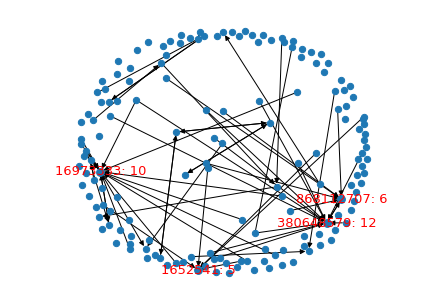

In [47]:
with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/bridges/user_followed_by.json") as file:
    followed_by = json.load(file)

with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/community_detection/with_bridges.json") as file:
    communities = json.load(file)

# with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/centrality/degree/in_degree.json") as file:
#     in_degree = json.load(file)

rum_community = communities["rumours"]

G = nx.DiGraph()
G.add_nodes_from(rum_community)

for id in rum_community:
    try : followers = (followed_by[id])["rumours"]
    except: continue
    
    for f in followers:
        G.add_edge(f,id)

labels = {}
for id in G:
    if (G.in_degree[id] > 2) : labels[id] = id+": "+str(G.in_degree[id])

# pos = nx.spring_layout(G)
pos = nx.spring_layout(G, k=0.8)
# , iterations=20
nx.draw(G,pos,node_size=40)
nx.draw_networkx_nodes(G,pos,nodelist=labels.keys(), node_size=60)
nx.draw_networkx_labels(G,pos,labels,font_size=13,font_color='r')
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.25
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.show()

Connectivity within non-rumour community

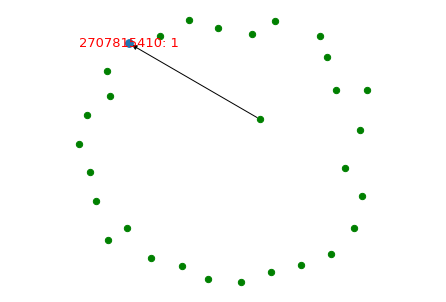

In [49]:
with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/bridges/user_followed_by.json") as file:
    followed_by = json.load(file)

with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/community_detection/with_bridges.json") as file:
    communities = json.load(file)

# with open("/Users/yu-hung/Downloads/pheme-rumour-scheme-dataset/centrality/degree/in_degree.json") as file:
#     in_degree = json.load(file)

nonrum_community = communities["non_rumours"]

G = nx.DiGraph()
G.add_nodes_from(nonrum_community)

for id in nonrum_community:
    try : followers = (followed_by[id])["non_rumours"]
    except: continue
    
    for f in followers:
        G.add_edge(f,id)

labels = {}
for id in G:
    if (G.in_degree[id] > 0) : labels[id] = id+": "+str(G.in_degree[id])

# pos = nx.spring_layout(G)
pos = nx.spring_layout(G, k=0.8)
# , iterations=20
nx.draw(G,pos,node_size=40,node_color="green")
nx.draw_networkx_nodes(G,pos,nodelist=labels.keys(), node_size=60)
nx.draw_networkx_labels(G,pos,labels,font_size=13,font_color='r')
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.25
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.show()

In [ ]:
isolates = set(isolates)
rumourNodes = list(set(rumourNodes).difference(isolates))
non_rumourNodes = list(set(non_rumourNodes).difference(isolates))
bridgeNodes = list(set(bridgeNodes).difference(isolates))

# pos = nx.spring_layout(G, k=0.15, iterations=20)
pos = nx.random_layout(G)
node_size = 30

# nx.draw_networkx_nodes(G, pos, nodelist=rumourNodes, node_size=node_size, node_color="tab:red")
# nx.draw_networkx_nodes(G, pos, nodelist=non_rumourNodes, node_size=node_size, node_color="tab:green")
# nx.draw_networkx_nodes(G, pos, nodelist=bridgeNodes, node_size=node_size, node_color="tab:blue")

# nx.draw_networkx_edges(
#             G,
#             pos,
#             edgelist=G.out_edges(rumourNodes),
#             edge_color="tab:red"
#         )
# nx.draw_networkx_edges(
#             G,
#             pos,
#             edgelist=G.out_edges(non_rumourNodes),
#             edge_color="tab:green"
#         )
# nx.draw_networkx_edges(
#             G,
#             pos,
#             edgelist=G.in_edges(bridgeNodes),
#             edge_color="tab:blue"
#         )

plt.show()

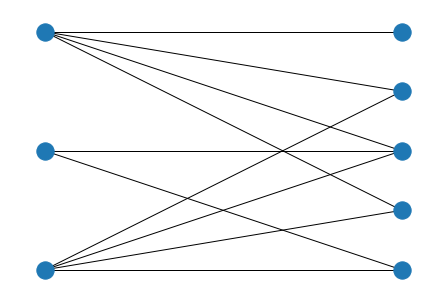

In [20]:
G = nx.bipartite.gnmk_random_graph(3, 5, 10, seed=123)
top = nx.bipartite.sets(G)[0]
pos = nx.bipartite_layout(G, top)
nx.draw(G,pos)
plt.show()